# WeRateDogs Twitter Data Wrangling Project

The dataset that we will be wrangling is the twitter data of Twitter user [@dog_rates](https://twitter.com/dog_rates), also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog.

In [1]:
# Importing librabries required for data wrangling
import pandas as pd
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import json
import tweepy
import time

## Data Gathering

First we need to gather all the data required for our analysis of the "WeRateDogs Twitter archive" 

- Read the csv file `twitter_archive_enhanced.csv` which has the WeRateDogs Twitter archive, into a pandas dataframe

In [2]:
# Reading the csv file into a dataframe

df_twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
df_twitter_archive.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


- Download the `image_predictions.tsv` file where image prediction of the tweet images are present, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. 

In [246]:
# Downloading the file 'image_predictions.tsv' using requests library

url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

In [247]:
# Reading the binary file 
with open("image-predictions.tsv", mode='wb') as file:
    file.write(response.content)

In [3]:
# Reading the downloaded tsv file to a dataframe
df_image_predict = pd.read_csv('image-predictions.tsv',sep='\t')
df_image_predict.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [249]:
df_image_predict.shape

(2075, 12)

- Query Twitter's API using tweepy library for additional data beyond the data included in the WeRateDogs Twitter archive. This additional data will include retweet count and favorite count.

In [250]:
# Assigning the keys and secret tokens for authentication
consumer_key = '<consumer_key>'
consumer_secret = '<consumer_secret>'
access_token = '<access_token>'
access_secret = '<access_secret>'

# Creating the API object used to gather the twitter data
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

Collect the json data from the twitter api and save it into a file named `tweet_json.txt`

In [260]:
# initialize the count of tweets, no_tweet_list, and time
count = 0
no_tweet_list = []
start = time.time()

# loop through each tweet id and write to outfile 'tweet_json.txt'
with open('tweet_json.txt', 'w') as outfile:
    for tweet in df_twitter_archive.tweet_id:
        count += 1
        try:
            # print(str(count) + ':' + str(tweet))
            json_data = api.get_status(tweet, tweet_mode='extended')
            #tweet_list.append(json_data)
            json.dump(json_data._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print(str(count) + ':' + str(tweet))
            print(e)
            no_tweet_list.append(tweet)
end = time.time()
duration = end - start
print("Duration :"+ str(end - start))

20:888202515573088257
[{'code': 144, 'message': 'No status found with that ID.'}]
96:873697596434513921
[{'code': 144, 'message': 'No status found with that ID.'}]
102:872668790621863937
[{'code': 144, 'message': 'No status found with that ID.'}]
105:872261713294495745
[{'code': 144, 'message': 'No status found with that ID.'}]
119:869988702071779329
[{'code': 144, 'message': 'No status found with that ID.'}]
133:866816280283807744
[{'code': 144, 'message': 'No status found with that ID.'}]
156:861769973181624320
[{'code': 144, 'message': 'No status found with that ID.'}]
183:856602993587888130
[{'code': 144, 'message': 'No status found with that ID.'}]
248:845459076796616705
[{'code': 144, 'message': 'No status found with that ID.'}]
254:844704788403113984
[{'code': 144, 'message': 'No status found with that ID.'}]
261:842892208864923648
[{'code': 144, 'message': 'No status found with that ID.'}]
299:837012587749474308
[{'code': 144, 'message': 'No status found with that ID.'}]
383:82

Rate limit reached. Sleeping for: 110


933:754011816964026368
[{'code': 144, 'message': 'No status found with that ID.'}]
1727:680055455951884288
[{'code': 144, 'message': 'No status found with that ID.'}]
Duration :2363.088932991028


Reading the newly created tweet_json.txt file and appending `tweet_id`, `favorite_count` and `retweet_count` to a list 

In [4]:
tweet_list = []
# loop through the file and append 'tweet_id', 'favorite_count' and 'retweet_count' data to the list
with open('tweet_json.txt') as json_file:
    for line in json_file:
        status = json.loads(line)
        tweet_id = status['id_str']
        favorite_count = status['favorite_count']
        retweet_count = status['retweet_count']
        tweet_list.append({'tweet_id': tweet_id,
                          'favorite_count': favorite_count,
                          'retweet_count': retweet_count})

In [134]:
tweet_list[:5]

[{'tweet_id': '892420643555336193',
  'favorite_count': 37472,
  'retweet_count': 8161},
 {'tweet_id': '892177421306343426',
  'favorite_count': 32202,
  'retweet_count': 6040},
 {'tweet_id': '891815181378084864',
  'favorite_count': 24276,
  'retweet_count': 3998},
 {'tweet_id': '891689557279858688',
  'favorite_count': 40794,
  'retweet_count': 8305},
 {'tweet_id': '891327558926688256',
  'favorite_count': 39010,
  'retweet_count': 9008}]

In [5]:
# create a new dataframe from the list of dictionaries 'tweet_list'
df_tweet_json = pd.DataFrame(tweet_list, columns=['tweet_id','favorite_count','retweet_count'])
df_tweet_json = df_tweet_json.reset_index(drop=True)

In [6]:
df_tweet_json.head()

,tweet_id,favorite_count,retweet_count
0,892420643555336193,37472,8161
1,892177421306343426,32202,6040
2,891815181378084864,24276,3998
3,891689557279858688,40794,8305
4,891327558926688256,39010,9008


## Data Assessing

- Table ***df_twitter_archive***

In [135]:
# Visually assessing the data
df_twitter_archive.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
139,865359393868664832,NaN,NaN,2017-05-19 00:12:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sammy. Her tongue ejects without warni...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/865359393...,13,10,Sammy,None,None,None,None
1290,708130923141795840,NaN,NaN,2016-03-11 03:22:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Please stop sending in non canines like this G...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/708130923...,11,10,None,None,None,None,None
588,799422933579902976,NaN,NaN,2016-11-18 01:24:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Longfellow (prolly sophisticated). He'...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/799422933...,12,10,Longfellow,None,None,None,None
1438,696900204696625153,NaN,NaN,2016-02-09 03:35:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Rosie. She's a Benebark Cumberpatch. S...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/696900204...,12,10,Rosie,None,None,None,None
1499,692187005137076224,NaN,NaN,2016-01-27 03:26:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a rare Arctic Wubberfloof. Unamused by...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/692187005...,12,10,a,None,None,None,None
286,838831947270979586,NaN,NaN,2017-03-06 19:21:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Riley. His owner put a ...,7.838400e+17,4.196984e+09,2016-10-06 01:23:05 +0000,https://twitter.com/dog_rates/status/783839966...,13,10,Riley,None,None,None,None
2111,670442337873600512,NaN,NaN,2015-11-28 03:21:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Koda. He's large. Looks very soft. Great ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670442337...,11,10,Koda,None,None,None,None
1621,684926975086034944,NaN,NaN,2016-01-07 02:38:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Bruiser &amp; Charlie. They are the best ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/684926975...,11,10,Bruiser,None,None,None,None
1780,677700003327029250,NaN,NaN,2015-12-18 04:00:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ralph. He's an interpretive dancer. 10...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/677700003...,10,10,Ralph,None,None,None,None
352,831315979191906304,NaN,NaN,2017-02-14 01:35:49 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",I couldn't make it to the #WKCDogShow BUT I ha...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/831315979...,13,10,None,None,None,pupper,None


In [9]:
df_twitter_archive.shape

(2356, 17)

In [10]:
df_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

*Check if the tweets have more than one dog stages assigned to them*

In [11]:
# Number of not null valued stages
df_twitter_archive[df_twitter_archive['doggo'] != "None"].shape[0] + df_twitter_archive[df_twitter_archive['floofer'] != "None"].shape[0] + df_twitter_archive[df_twitter_archive['pupper'] != "None"].shape[0] + df_twitter_archive[df_twitter_archive['puppo'] != "None"].shape[0]

394

In [12]:
# Number of records whose both doggo and floofer columns are not None
df_twitter_archive[(df_twitter_archive['doggo'] != "None") & (df_twitter_archive['floofer']!= "None")].shape[0]

1

In [13]:
# Number of records whose both doggo and pupper columns are not None
df_twitter_archive[(df_twitter_archive['doggo'] != "None") & (df_twitter_archive['pupper']!= "None")].shape[0]

12

In [14]:
# Number of records whose both doggo and puppo columns are not None
df_twitter_archive[(df_twitter_archive['doggo'] != "None") & (df_twitter_archive['puppo']!= "None")].shape[0]

1

In [15]:
# Number of records whose both floofer and pupper columns are not None
df_twitter_archive[(df_twitter_archive['floofer'] != "None") & (df_twitter_archive['pupper']!= "None")].shape[0]

0

In [16]:
# Number of records whose both floofer and puppo columns are not None
df_twitter_archive[(df_twitter_archive['floofer'] != "None") & (df_twitter_archive['puppo']!= "None")].shape[0]

0

In [17]:
# Number of records whose both pupper and puppo columns are not None
df_twitter_archive[(df_twitter_archive['pupper'] != "None") & (df_twitter_archive['puppo']!= "None")].shape[0]

0

**Observation**: *Same dog is classified in more than one stage which is wrong*

In [18]:
df_twitter_archive['name'].value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
Oliver         11
Tucker         10
Lola           10
Penny          10
Bo              9
Winston         9
Sadie           8
the             8
an              7
Daisy           7
Bailey          7
Buddy           7
Toby            7
Oscar           6
Jax             6
Koda            6
Scout           6
Bella           6
Stanley         6
Jack            6
Leo             6
Dave            6
Milo            6
Rusty           6
Finn            5
             ... 
Shelby          1
Rumpole         1
Ambrose         1
Gabby           1
Harrison        1
Evy             1
Winifred        1
Rudy            1
Jerome          1
Filup           1
Lipton          1
Kayla           1
Zuzu            1
Opie            1
Bowie           1
Chase           1
Kane            1
Rueben          1
Rey             1
Andy            1
Rascal          1
Rose            1
Lacy            1
Mitch           1
officially

**Observation**: *Some dog names are not correct/valid. Also most of the inccorect names are of lower case*

In [19]:
# finding all the null valued expanded_urls from df_twitter_archive table
null_urls = df_twitter_archive[df_twitter_archive['expanded_urls'].isnull()].tweet_id

In [20]:
# Check if the null valued tweet ids are present in image prediction table
df_image_predict[df_image_predict.tweet_id.isin(null_urls)]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


**Observation**: *Since the null values tweets in twitter archive table are not present in image prediction table, these records are of no use for our analysis and hence can be dropped.*

In [21]:
# finding all the duplicate valued expanded_urls from df_twitter_archive table
duplicate_urls = df_twitter_archive[df_twitter_archive['expanded_urls'].duplicated()].tweet_id

In [22]:
# Check if the duplicate tweet ids are present in image prediction table
df_image_predict[df_image_predict.tweet_id.isin(duplicate_urls)]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,3.391940e-02,False,partridge,5.206580e-05,False
60,667138269671505920,https://pbs.twimg.com/media/CUImtzEVAAAZNJo.jpg,1,West_Highland_white_terrier,0.747713,True,Samoyed,2.436290e-01,True,toy_poodle,1.803970e-03,True
61,667152164079423490,https://pbs.twimg.com/media/CUIzWk_UwAAfUNq.jpg,1,toy_poodle,0.535411,True,Pomeranian,8.754400e-02,True,miniature_poodle,6.205000e-02,True
68,667182792070062081,https://pbs.twimg.com/media/CUJPNjOWsAAZRqP.jpg,1,golden_retriever,0.949892,True,Irish_setter,1.056380e-02,True,Chesapeake_Bay_retriever,5.821410e-03,True
106,667866724293877760,https://pbs.twimg.com/media/CUS9PlUWwAANeAD.jpg,1,jigsaw_puzzle,1.000000,False,prayer_rug,1.011300e-08,False,doormat,1.740170e-10,False
172,669000397445533696,https://pbs.twimg.com/media/CUjETvDVAAI8LIy.jpg,1,Pembroke,0.822940,True,Cardigan,1.770350e-01,True,basenji,2.335260e-05,True
380,673295268553605120,https://pbs.twimg.com/media/CVgGc9hWIAIe1bn.jpg,1,golden_retriever,0.889241,True,Labrador_retriever,6.468330e-02,True,Great_Pyrenees,1.261260e-02,True
534,676936541936185344,https://pbs.twimg.com/media/CWT2MUgWIAECWig.jpg,1,Chesapeake_Bay_retriever,0.545286,True,Norwegian_elkhound,8.148200e-02,True,space_heater,4.739110e-02,False
592,679462823135686656,https://pbs.twimg.com/media/CW3v1KxW8AAIOuy.jpg,1,toy_poodle,0.621780,True,miniature_poodle,1.978190e-01,True,soft-coated_wheaten_terrier,4.674500e-02,True
607,680055455951884288,https://pbs.twimg.com/media/CW-ZRC_WQAAyFrL.jpg,1,Samoyed,0.995466,True,Great_Pyrenees,1.833950e-03,True,Pomeranian,6.669490e-04,True


In [23]:
# Picking a random duplicated url from the above filtered dataframe
df_twitter_archive[df_twitter_archive['expanded_urls'].duplicated()].iloc[8].expanded_urls

'https://twitter.com/dog_rates/status/866334964761202691/photo/1,https://twitter.com/dog_rates/status/866334964761202691/photo/1'

In [24]:
# Checking both the duplicated records for the choosen duplicate url
df_twitter_archive[df_twitter_archive['expanded_urls'] == 'https://twitter.com/dog_rates/status/866334964761202691/photo/1,https://twitter.com/dog_rates/status/866334964761202691/photo/1']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
91,874434818259525634,NaN,NaN,2017-06-13 01:14:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Coco. At first I though...,8.663350e+17,4.196984e+09,2017-05-21 16:48:45 +0000,https://twitter.com/dog_rates/status/866334964...,12,10,Coco,None,None,None,None
136,866334964761202691,NaN,NaN,2017-05-21 16:48:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Coco. At first I thought she was a clo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/866334964...,12,10,Coco,None,None,None,None


**Observation**: *Duplicate tweets are present and also this duplicate tweets are present in the image prediction table. But after closly inspecting those records it was observed that most not null duplicated url tweets were retweets. Hence after deleting all the retweets this not null duplicate url tweets also should be removed*

In [25]:
df_twitter_archive['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [26]:
df_twitter_archive['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

**Observation**: *The rating denominator value is not 10 always and rating numerator values vary alot from a range of 1-1776.*

- **Table `df_image_predict`**

In [136]:
# Visually assessing the data
df_image_predict.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1722,819711362133872643,https://pbs.twimg.com/media/C2AzHjQWQAApuhf.jpg,2,acorn_squash,0.848704,False,toilet_seat,0.044348,False,toy_poodle,0.022009,True
1951,863432100342583297,https://pbs.twimg.com/media/C_uG6eAUAAAvMvR.jpg,1,Staffordshire_bullterrier,0.690517,True,French_bulldog,0.103360,True,beagle,0.079489,True
522,676582956622721024,https://pbs.twimg.com/media/CWO0m8tUwAAB901.jpg,1,seat_belt,0.790028,False,Boston_bull,0.196307,True,French_bulldog,0.012429,True
1937,860276583193509888,https://pbs.twimg.com/media/C_BQ_NlVwAAgYGD.jpg,1,lakeside,0.312299,False,dock,0.159842,False,canoe,0.070795,False
83,667495797102141441,https://pbs.twimg.com/media/CUNr4-7UwAAg2lq.jpg,1,Chihuahua,0.143957,True,Christmas_stocking,0.118651,False,ski_mask,0.092482,False
1509,785927819176054784,https://pbs.twimg.com/media/CugtKeXWEAAamDZ.jpg,1,teddy,0.972070,False,toy_poodle,0.008493,True,chow,0.002883,True
1631,805520635690676224,https://pbs.twimg.com/media/Cy3IvdZXgAUoEaj.jpg,1,malinois,0.643147,True,German_shepherd,0.186642,True,Border_terrier,0.109345,True
1185,738885046782832640,https://pbs.twimg.com/media/CkEMBz9WYAAGLaa.jpg,1,bath_towel,0.878320,False,swab,0.020633,False,American_Staffordshire_terrier,0.015535,True
1210,742465774154047488,https://pbs.twimg.com/media/Ck3EribXEAAPhZn.jpg,1,web_site,0.997154,False,comic_book,0.000439,False,desktop_computer,0.000268,False
229,670403879788544000,https://pbs.twimg.com/media/CU3AxW1WoAA3_35.jpg,1,pug,0.802223,True,French_bulldog,0.172557,True,bull_mastiff,0.007163,True


In [28]:
df_image_predict.shape

(2075, 12)

In [29]:
df_image_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


*Check for duplicate image predictions*

In [30]:
df_image_predict[df_image_predict['jpg_url'].duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1297,752309394570878976,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1315,754874841593970688,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,1,pug,0.272205,True,bull_mastiff,0.251530,True,bath_towel,0.116806,False
1333,757729163776290825,https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg,2,cash_machine,0.802333,False,schipperke,0.045519,True,German_shepherd,0.023353,True
1345,759159934323924993,https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg,1,Irish_terrier,0.254856,True,briard,0.227716,True,soft-coated_wheaten_terrier,0.223263,True
1349,759566828574212096,https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg,1,Labrador_retriever,0.967397,True,golden_retriever,0.016641,True,ice_bear,0.014858,False
1364,761371037149827077,https://pbs.twimg.com/tweet_video_thumb/CeBym7...,1,brown_bear,0.713293,False,Indian_elephant,0.172844,False,water_buffalo,0.038902,False
1368,761750502866649088,https://pbs.twimg.com/media/CYLDikFWEAAIy1y.jpg,1,golden_retriever,0.586937,True,Labrador_retriever,0.398260,True,kuvasz,0.005410,True
1387,766078092750233600,https://pbs.twimg.com/media/ChK1tdBWwAQ1flD.jpg,1,toy_poodle,0.420463,True,miniature_poodle,0.132640,True,Chesapeake_Bay_retriever,0.121523,True
1407,770093767776997377,https://pbs.twimg.com/media/CkjMx99UoAM2B1a.jpg,1,golden_retriever,0.843799,True,Labrador_retriever,0.052956,True,kelpie,0.035711,True
1417,771171053431250945,https://pbs.twimg.com/media/CVgdFjNWEAAxmbq.jpg,3,Samoyed,0.978833,True,Pomeranian,0.012763,True,Eskimo_dog,0.001853,True


In [31]:
df_image_predict[df_image_predict['jpg_url'] == "https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg"]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
591,679158373988876288,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,1,pug,0.272205,True,bull_mastiff,0.25153,True,bath_towel,0.116806,False
1315,754874841593970688,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,1,pug,0.272205,True,bull_mastiff,0.25153,True,bath_towel,0.116806,False


**Observation**: There are 66 duplicate image predictions having different tweet ids

*Check if there are any records in twitter_archive table whose corresponding record with same tweet_id is missing in image_predict table*

In [32]:
df_twitter_archive[~df_twitter_archive.tweet_id.isin(df_image_predict.tweet_id)].shape[0]

281

**Observation**: *There are 281 records in twitter_archive table whose corresponding record with same tweet_id is missing in image_predict table*

*Check if predictions for NOT dog are correct*

In [33]:
df_image_predict[(df_image_predict['p1_dog']== False) & (df_image_predict['p2_dog'] == False) & (df_image_predict['p3_dog'] == False)].shape[0]

324

In [34]:
df_image_predict[(df_image_predict['p1_dog']== False) & (df_image_predict['p2_dog'] == False) & (df_image_predict['p3_dog'] == False)]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,4.588540e-02,False,terrapin,1.788530e-02,False
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,3.391940e-02,False,partridge,5.206580e-05,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,8.554740e-02,False,bookcase,7.947970e-02,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,1.525000e-02,False,great_grey_owl,1.320720e-02,False
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996496,False,skunk,2.402450e-03,False,hamster,4.608630e-04,False
29,666411507551481857,https://pbs.twimg.com/media/CT-RugiWIAELEaq.jpg,1,coho,0.404640,False,barracouta,2.714850e-01,False,gar,1.899450e-01,False
45,666786068205871104,https://pbs.twimg.com/media/CUDmZIkWcAAIPPe.jpg,1,snail,0.999888,False,slug,5.514170e-05,False,acorn,2.625800e-05,False
50,666837028449972224,https://pbs.twimg.com/media/CUEUva1WsAA2jPb.jpg,1,triceratops,0.442113,False,armadillo,1.140710e-01,False,common_iguana,4.325530e-02,False
51,666983947667116034,https://pbs.twimg.com/media/CUGaXDhW4AY9JUH.jpg,1,swab,0.589446,False,chain_saw,1.901420e-01,False,wig,3.450970e-02,False
53,667012601033924608,https://pbs.twimg.com/media/CUG0bC0U8AAw2su.jpg,1,hyena,0.987230,False,African_hunting_dog,1.260080e-02,False,coyote,5.735010e-05,False


**Observation**: *Individually opened some of the urls for which the prediction was NOT dog. Even though most of the images were correctly identified, there were some images for which the prediction was wrong. Below is one of the images of a dog for which the prediction was a 'dishwasher' and NOT dog.*

![title](https://pbs.twimg.com/media/C7iNfq1W0AAcbsR.jpg)

- Table ***df_tweet_json***

In [137]:
df_tweet_json.head()

,tweet_id,favorite_count,retweet_count
0,892420643555336193,37472,8161
1,892177421306343426,32202,6040
2,891815181378084864,24276,3998
3,891689557279858688,40794,8305
4,891327558926688256,39010,9008


In [36]:
df_tweet_json.shape

(2337, 3)

In [37]:
df_tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2337 entries, 0 to 2336
Data columns (total 3 columns):
tweet_id          2337 non-null object
favorite_count    2337 non-null int64
retweet_count     2337 non-null int64
dtypes: int64(2), object(1)
memory usage: 54.9+ KB


### Quality issues observed:-
Table ***twitter_archive*** 
> - Errorneous data type for `tweet_id`. Should be a string/object datatype
> - Column `timestamp` and `retweeted_status_timestamp` are of **object** datatype and should be converted to **datetime** datatype
> - Columns `in_reply_to_status_id` and `in_reply_to_user_id` both have only 78 non null values. Hence they are no good for analysis and can be dropped.
> - Columns `retweeted_status_id` , `retweeted_status_user_id` and `retweeted_status_timestamp` have 181 non null values. The 181 tweets  are retweets which have to be removed. 
> - After cleaning the duplicates(i.e. dropping retweets) will have empty retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp columns, which can be dropped.
> - Null valued records for column `expanded_urls` are of no use for our analysis as they are not present in image prediction table. Hence need to be deleted.
> - Duplicate tweets since they have duplicate urls, i.e., column `expanded_urls` which should be removed as they are retweets
> - Most of the records don't have any assigned stage to them and some records have more than one dog stage.
> - Dog names are misspelled, mislabeled and missing.
> - Rating numerator and denominator value for some tweets are incorrect.  


Table ***image prediction***
> - errorneous data type for `tweet_id`. Should be a string/object datatype
> - There are 281 records in twitter_archive table whose corresponding record with same tweet_id is missing in image_predict table
> - 66 duplicate records were found since all of them predict the same image (seems like retweets).
> -  There were some images for which the prediction was wrong. (Nothing can be done as any details about the prediction model used is not known.)

- df_twitter_archive has 2356 records, df_tweet_json has 2337 records and df_image_predict has 2075 records. Hence there are missing data which needs to be addressed.

### Tidiness issues observed:-

> - "breed" column should be added in arc_df table; its values based on p1_conf and p1_dog columns of df_image_predict (image predictions) table
> - doggo, floofer, pupper and puppo columns in arc_df table should be merged into one column named "stage"
> - retweet_count and favorite_count columns from df_tweet_json (tweet status) table should be joined with df_twitter_archive table


## Data Cleaning

In [8]:
# Copying the original dataset to new dataframes for cleaning

c_df_tweet_arch = df_twitter_archive.copy()
c_df_img_predict = df_image_predict.copy()
c_df_tweet_json = df_tweet_json.copy()

- Table ***twitter archive***

#### 1. Errorneous datatype

**Define** : Data type for `tweet_id` to be changed to a string/object datatype from int and data type for `timestamp` to be changed to datetime from object

**Code**:-

In [9]:
c_df_tweet_arch['tweet_id'] = c_df_tweet_arch['tweet_id'].astype('str')
c_df_tweet_arch['timestamp'] = pd.to_datetime(c_df_tweet_arch['timestamp'])

**Test**:-

In [10]:
c_df_tweet_arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns, UTC]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64

#### 2. Dropping retweeted records 

**Define**: All 181 retweets are to be deleted.

**Code**:-

In [11]:
# Recheck the number of retweets
c_df_tweet_arch['retweeted_status_id'].notnull().sum()

181

In [12]:
# Drop all 181 retweet records
c_df_tweet_arch = c_df_tweet_arch[c_df_tweet_arch['retweeted_status_id'].isnull()]

**Test**:-

In [13]:
# 2175 records should be present
c_df_tweet_arch.shape[0]

2175

In [14]:
# Number of retweets should be zero
c_df_tweet_arch['retweeted_status_id'].notnull().sum()

0

**Define**: Remove unecessary columns associated with retweets and other columns not useful for analysis. Below are the columns to be removed:-
- in_reply_to_status_id
- in_reply_to_user_id
- retweeted_status_id
- retweeted_status_user_id
- retweeted_status_timestamp 

**Code**:-

In [15]:
# Dropping the unnecessary columns associated with retweets
c_df_tweet_arch.drop(columns=['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','in_reply_to_status_id','in_reply_to_user_id'], inplace=True)

**Test**:-

In [16]:
# Check if the columns are dropped
c_df_tweet_arch.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


#### 3. Dropping duplicate records, i.e., having same urls

**Define**: Find all the records having duplicate `expanded_urls` column and then drop those records.

**Code**:-

In [17]:
# Number of records having Null expanded_urls
c_df_tweet_arch[c_df_tweet_arch['expanded_urls'].isnull()].shape[0]

58

In [18]:
# Dropping all null valued 'expanded_urls' tweet
c_df_tweet_arch = c_df_tweet_arch[~c_df_tweet_arch['expanded_urls'].isnull()]

In [19]:
# Number of records having Duplicated expanded_urls
c_df_tweet_arch[c_df_tweet_arch['expanded_urls'].duplicated()].shape[0]

1

In [20]:
# Dropping all null valued 'expanded_urls' tweet
c_df_tweet_arch = c_df_tweet_arch[~c_df_tweet_arch['expanded_urls'].duplicated()]

**Test**:-

In [21]:
# a total of (2175-(58+1))=2116 records should be present after dropping the concerned rows.
c_df_tweet_arch.shape[0]

2116

In [22]:
# Re-check if any null/duplicate valued 'exapnded_urls' tweet is present or not
c_df_tweet_arch[c_df_tweet_arch['expanded_urls'].isnull()].shape[0]

0

In [23]:
c_df_tweet_arch[c_df_tweet_arch['expanded_urls'].duplicated()].shape[0]

0

#### 4. Classification  of a dog in more than one stage

**Define**: Find the records for which there are more than one stage assigned to a dog. Then drop those records as they may create problem while later melting and combining all the four stage columns to a single column named 'stage'.

**Code**:-

*As identified earlier while assessing the table twitter archives below are the records which have multiple stages assigned to them*

In [24]:
# Create a new dataframe consisting of the stages column
stage_matrix = c_df_tweet_arch[['tweet_id','doggo','floofer','pupper','puppo']].copy()

# Assigning 1s and 0s to values of stages column for easy analysis of records having multiple stages assigned to them
stage_matrix['doggo'] = stage_matrix['doggo'].replace('None', 0)
stage_matrix['doggo'] = stage_matrix['doggo'].replace('doggo', 1)
stage_matrix['floofer'] = stage_matrix['floofer'].replace('None', 0)
stage_matrix['floofer'] = stage_matrix['floofer'].replace('floofer', 1)
stage_matrix['pupper'] = stage_matrix['pupper'].replace('None', 0)
stage_matrix['pupper'] = stage_matrix['pupper'].replace('pupper', 1)
stage_matrix['puppo'] = stage_matrix['puppo'].replace('None', 0)
stage_matrix['puppo'] = stage_matrix['puppo'].replace('puppo', 1)

In [25]:
stage_matrix.head()

,tweet_id,doggo,floofer,pupper,puppo
0,892420643555336193,0,0,0,0
1,892177421306343426,0,0,0,0
2,891815181378084864,0,0,0,0
3,891689557279858688,0,0,0,0
4,891327558926688256,0,0,0,0


In [26]:
# Number of records having multiple stages assigned to them
stage_matrix[(stage_matrix['doggo'] + stage_matrix['floofer'] + stage_matrix['pupper'] + stage_matrix['puppo']) > 1].shape[0]

12

In [27]:
# Extracting the multi stage records to a new dataframe
multi_stage = stage_matrix[(stage_matrix['doggo'] + stage_matrix['floofer'] + stage_matrix['pupper'] + stage_matrix['puppo']) > 1]
multi_stage.head()

,tweet_id,doggo,floofer,pupper,puppo
191,855851453814013952,1,0,0,1
200,854010172552949760,1,1,0,0
460,817777686764523521,1,0,1,0
531,808106460588765185,1,0,1,0
565,802265048156610565,1,0,1,0


**Let's investigate it further to find out why are this dog tweets assigned multiple stages**

In [28]:
# Extracting the text corresponding to the tweets which have multiple stages assigned
multi_stage['text'] = c_df_tweet_arch[c_df_tweet_arch.tweet_id.isin(multi_stage.tweet_id)].text
multi_stage

C:\Users\Soumyadip\Anaconda3\envs\data_wrangle\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,tweet_id,doggo,floofer,pupper,puppo,text
191,855851453814013952,1,0,0,1,Here's a puppo participating in the #ScienceMa...
200,854010172552949760,1,1,0,0,"At first I thought this was a shy doggo, but i..."
460,817777686764523521,1,0,1,0,"This is Dido. She's playing the lead role in ""..."
531,808106460588765185,1,0,1,0,Here we have Burke (pupper) and Dexter (doggo)...
565,802265048156610565,1,0,1,0,"Like doggo, like pupper version 2. Both 11/10 ..."
575,801115127852503040,1,0,1,0,This is Bones. He's being haunted by another d...
705,785639753186217984,1,0,1,0,This is Pinot. He's a sophisticated doggo. You...
733,781308096455073793,1,0,1,0,"Pupper butt 1, Doggo 0. Both 12/10 https://t.c..."
889,759793422261743616,1,0,1,0,"Meet Maggie &amp; Lila. Maggie is the doggo, L..."
956,751583847268179968,1,0,1,0,Please stop sending it pictures that don't eve...


In [29]:
# printing the text for the records whose both doggo and pupper columns are not None
for i in range(multi_stage.shape[0]):
    print(multi_stage.iloc[i].text)

Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel
At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk
This is Dido. She's playing the lead role in "Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple." 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7
Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho
Like doggo, like pupper version 2. Both 11/10 https://t.co/9IxWAXFqze
This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj
This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still 10/10 would pet cautiously https://t.

In [30]:
# Checking the images corresponding to the tweets which have both doggo and pupper columns as not None
c_df_img_predict[c_df_img_predict.tweet_id.isin(multi_stage.tweet_id)].jpg_url

1155      https://pbs.twimg.com/media/CiyHLocU4AI2pJu.jpg
1201      https://pbs.twimg.com/media/CkjMx99UoAM2B1a.jpg
1292      https://pbs.twimg.com/media/Cm4phTpWcAAgLsr.jpg
1350      https://pbs.twimg.com/media/CotUFZEWcAA2Pku.jpg
1507      https://pbs.twimg.com/media/CucnLmeWAAALOSC.jpg
1609      https://pbs.twimg.com/media/Cx4h7zHUsAAqaJd.jpg
1616      https://pbs.twimg.com/media/CyI3zXgWEAACQfB.jpg
1644      https://pbs.twimg.com/media/Czb4iFRXgAIUMiN.jpg
1707    https://pbs.twimg.com/ext_tw_video_thumb/81777...
1913      https://pbs.twimg.com/media/C9oNt91WAAAFSLS.jpg
1919      https://pbs.twimg.com/media/C-CYWrvWAAU8AXH.jpg
Name: jpg_url, dtype: object

![title](https://pbs.twimg.com/media/CotUFZEWcAA2Pku.jpg)

After doing further investigation it was observed that all the records which had more than one stage assigned to it had more than one dog stage mentioned in it's `text`. Also after matching each tweet with it's corresponding images it is noticed that most of the images had two dogs in them, hence the multiple stages assigned to those tweets. 

Since, for our analysis this multiple stage tweets are appropriate and also in order to keep the analysis simple it is better to drop these multi stage tweet records.

In [31]:
# Dropping the records having multiple stages assigned to them
c_df_tweet_arch = c_df_tweet_arch[~c_df_tweet_arch.tweet_id.isin(multi_stage.tweet_id)]

**Test**:-

In [32]:
# 2163 rows should be present
c_df_tweet_arch.shape

(2104, 12)

In [33]:
# No records should be present
c_df_tweet_arch[c_df_tweet_arch.tweet_id.isin(multi_stage.tweet_id)]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


#### 5. Dog names are incorrect. 

**Define**: Find the records for which dog names are incorrect (most of them being lowercase words). After inspecting the tweet texts having incorrect dog names it is noticed that there is no dog name seen in the tweet text. Hence all the incorrect names should be turned to None as that is the most likely option. 

**Code**:-

In [34]:
# Re-inspecting the dog names with there value counts
c_df_tweet_arch['name'].value_counts()

None        615
a            55
Charlie      11
Lucy         11
Cooper       10
Oliver       10
Penny         9
Tucker        9
Lola          8
Winston       8
Sadie         8
the           7
Daisy         7
Toby          7
Jax           6
Stanley       6
Oscar         6
an            6
Koda          6
Bailey        6
Bo            6
Bella         6
Scout         5
Rusty         5
Louis         5
Buddy         5
Leo           5
Chester       5
Dave          5
Bentley       5
           ... 
Tiger         1
Dylan         1
Coleman       1
Mark          1
Brian         1
Herschel      1
Damon         1
Rumpole       1
Oddie         1
Shiloh        1
Shelby        1
Keet          1
Steve         1
Lilli         1
Rooney        1
Vinscent      1
Monty         1
Filup         1
Bowie         1
Bluebert      1
Winifred      1
Anakin        1
Nugget        1
Livvie        1
Banjo         1
Strider       1
Ron           1
life          1
Berkeley      1
Shikha        1
Name: name, Length: 953,

In [35]:
#filter those names which start with a lower_case letter
lowercase_names = c_df_tweet_arch[c_df_tweet_arch['name'].str[0].str.islower()]['name'].value_counts()
lowercase_names.keys()

Index(['a', 'the', 'an', 'very', 'one', 'quite', 'just', 'actually', 'getting',
       'not', 'mad', 'space', 'infuriating', 'this', 'light', 'my', 'such',
       'incredibly', 'all', 'by', 'unacceptable', 'his', 'old', 'officially',
       'life'],
      dtype='object')

In [36]:
# Replacing all the lower_case starting letter names with 'Nan'
for lc_name in lowercase_names.keys():
    c_df_tweet_arch['name'] = c_df_tweet_arch['name'].replace(lc_name,np.nan)

In [37]:
# Also replace all the "None" values to Nan
c_df_tweet_arch['name'] = c_df_tweet_arch['name'].replace('None', np.nan)

**Test**:-

In [38]:
# Check if any the lowercase starting dog names are present
(c_df_tweet_arch['name'].str[0].str.islower() == True).sum()

0

In [39]:
# Check the value counts for different dog names
c_df_tweet_arch['name'].value_counts()

Lucy        11
Charlie     11
Cooper      10
Oliver      10
Penny        9
Tucker       9
Sadie        8
Lola         8
Winston      8
Toby         7
Daisy        7
Koda         6
Bailey       6
Stanley      6
Jax          6
Bo           6
Oscar        6
Bella        6
Milo         5
Buddy        5
Bentley      5
Louis        5
Leo          5
Scout        5
Dave         5
Rusty        5
Chester      5
Jerry        4
Phil         4
Duke         4
            ..
Tiger        1
Dylan        1
Coleman      1
Mark         1
Crumpet      1
JD           1
Brian        1
Traviss      1
Filup        1
Shiloh       1
Shelby       1
Keet         1
Steve        1
Levi         1
Lilli        1
Rooney       1
Vinscent     1
Monty        1
Bowie        1
Rumpole      1
Bluebert     1
Winifred     1
Anakin       1
Nugget       1
Livvie       1
Banjo        1
Strider      1
Ron          1
Berkeley     1
Shikha       1
Name: name, Length: 927, dtype: int64

#### 6. Correcting the rating numerator and denominator values for tweets

**Define**: Find out the errorneous rating value for denominators, i.e., the denominator values other than 10. Check the text of those tweets to see if the rating was wrongly entered as the ratings were mentioned in the text field. If there is actaully no proper denominator in the text, then remove those rating values.

**Code**:-

In [40]:
# Check the value_counts for the different denominator values of rating
c_df_tweet_arch['rating_denominator'].value_counts()

10     2086
50        3
11        2
80        2
7         1
170       1
150       1
130       1
120       1
110       1
90        1
70        1
40        1
20        1
2         1
Name: rating_denominator, dtype: int64

In [41]:
# Number of tweets having rating_denominator value not eqaul to 10
denominator_not_10 = c_df_tweet_arch[c_df_tweet_arch['rating_denominator'] != 10]['tweet_id'].count()
denominator_not_10

18

In [42]:
# print the text for all 18 records whose denominator value for rating is not equal to 10
for i in range(denominator_not_10):
    print(c_df_tweet_arch[c_df_tweet_arch['rating_denominator'] != 10].iloc[i].text)

The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd
Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. 
Keep Sam smiling by clicking and sharing this link:
https://t.co/98tB8y7y7t https://t.co/LouL5vdvxx
Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE
After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ
Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv
Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a
This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq
Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1
Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12
From

It is noticed that the text section of most of the tweets actually don't have a rating denominator of 10. But some of the tweets do have a rating denominator of 10 and are wrongly misinterpreted while recoding the ratings. Those tweets which do have a rating '/10' can be corrected and the ones which actually don't have a correct rating are to be removed.

In [43]:
# Number of records which do not actually have a rating denominator of 10 (/10) in there text field
denominator_not_10 = c_df_tweet_arch[~c_df_tweet_arch['text'].str.contains("/10")].shape[0]
denominator_not_10

13

In [44]:
# Drop the records which do not actually have a rating denominator of 10 (/10) in there text field
c_df_tweet_arch = c_df_tweet_arch[c_df_tweet_arch['text'].str.contains("/10")]

In [45]:
# Number of records present in the cleaned twitter archive table should be 2104-13 = 2091
len(c_df_tweet_arch)

2091

In [46]:
#check the remaining 18-13=5 tweets and manually fix them
for i in range(5):
    print(c_df_tweet_arch[c_df_tweet_arch['rating_denominator'] != 10].iloc[i].text)

After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ
Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a
This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq
This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5
This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv


In [47]:
# store the indexes of the 5 tweets whose denominator rating is not equal to 10
idx = c_df_tweet_arch[c_df_tweet_arch['rating_denominator'] != 10].index
# loop through those tweets and manually change the denominator rating of those tweets to 10
for i in idx:
    c_df_tweet_arch.at[i, 'rating_denominator'] = 10

**Test**:-

In [48]:
# Check if any other tweet with denominator rating not equal to 10 is present
c_df_tweet_arch[c_df_tweet_arch['rating_denominator'] != 10]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [49]:
#Check the value_counts for the column 'rating_denominator'
c_df_tweet_arch['rating_denominator'].value_counts()

10    2091
Name: rating_denominator, dtype: int64

**Define**: Find out the errorneous rating value for numerators. As the ratings were mentioned in the text field check the text of those tweets to see if the rating was wrongly entered. If there is actaully no proper numerator in the text, then remove those rating values.

**Code**:-

In [50]:
c_df_tweet_arch['rating_numerator'].value_counts()

12      483
10      435
11      415
13      292
9       154
8        98
7        52
14       40
5        33
6        32
3        19
4        16
2         9
1         5
0         2
75        1
26        1
50        1
27        1
1776      1
420       1
Name: rating_numerator, dtype: int64

In [51]:
# Initialize two lists to store the indexes of the records, one for storing the records whose text cannot be parsed by using 
# find() and other whose recorded numerator rating does not match with the numerator mentioned in the text field.
cannot_parse = []
incorrect = []
# looping through each record and finding the mentioned numerator rating in the text field
for i in c_df_tweet_arch.index:
    idx = int(c_df_tweet_arch.loc[i].text.find('/10'))
    try:
        numerator = int(c_df_tweet_arch.loc[i].text[idx-2:idx].strip())
    except:
        cannot_parse.append(i)
        continue
    if numerator != c_df_tweet_arch.loc[i].rating_numerator:
        incorrect.append(i)

In [52]:
# print the index and corresponding text field and rating_numerator field for the incorrect numerator rating records
for i in incorrect:
    print('{} : {} : {}'.format(i, c_df_tweet_arch['text'].loc[i],  c_df_tweet_arch['rating_numerator'].loc[i]))

979 : This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh : 1776
1068 : After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ : 9
1165 : Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a : 4
1202 : This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq : 50
1662 : This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5 : 7
2074 : After so many requests... here you go.

Good dogg. 420/10 https://t.co/yfAAo1gdeY : 420
2335 : This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv : 1


After finding out the text for the records which had incorrect numerator ratings it was observed that except two records (index = 979, 2074) for all the other records the numerator rating was wrongly interpreted and hence has to fixed manually.

In [53]:
# Manually assigning the correct numerator ratings to the incorrect records
c_df_tweet_arch.loc[1068,'rating_numerator'] = 14
c_df_tweet_arch.loc[1165,'rating_numerator'] = 13
c_df_tweet_arch.loc[1202,'rating_numerator'] = 11
c_df_tweet_arch.loc[1662,'rating_numerator'] = 10
c_df_tweet_arch.loc[2335,'rating_numerator'] = 9

In [54]:
# print the index and corresponding text field and rating_numerator field for the incorrect numerator rating records
for i in cannot_parse:
    print('{} : {} : {}'.format(i,c_df_tweet_arch['text'].loc[i],c_df_tweet_arch['rating_numerator'].loc[i]))

45 : This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948 : 5
1025 : This is an Iraqi Speed Kangaroo. It is not a dog. Please only send in dogs. I'm very angry with all of you ...9/10 https://t.co/5qpBTTpgUt : 9
1372 : I know it's tempting, but please stop sending in pics of Donald Trump. Thank you ...9/10 https://t.co/y35Y1TJERY : 9
1435 : Please stop sending in saber-toothed tigers. This is getting ridiculous. We only rate dogs.
...8/10 https://t.co/iAeQNueou8 : 8
1610 : For the last time, WE. DO. NOT. RATE. BULBASAUR. We only rate dogs. Please only send dogs. Thank you ...9/10 https://t.co/GboDG8WhJG : 9
1653 : "Hello forest pupper I am house pupper welcome to my abode" (8/10 for both) https://t.co/qFD8217fUT : 8
2246 : This is Tedrick. He lives on the edge. Needs someone to hit the gas tho. Other than that he's a baller. 10&amp;2/10 https://t.co/LvP1TTYSCN : 2


After inspecting the text from the text field of the records that cannot be parsed it is observed that all those records actually have been assigned the correct numerator rating except one which can be manually fixed. 

In [55]:
# Manually assigning the correct numerator ratings to the incorrect records (rounding off the assigned rating as the data type is int)
c_df_tweet_arch.loc[45,'rating_numerator'] = 14

**Test**:-

In [56]:
# Checking the value_counts of different numerators recorded
c_df_tweet_arch['rating_numerator'].value_counts()

12      483
10      436
11      416
13      293
9       154
8        98
7        51
14       42
5        32
6        32
3        19
4        15
2         9
1         4
0         2
75        1
26        1
27        1
1776      1
420       1
Name: rating_numerator, dtype: int64

In [57]:
c_df_tweet_arch.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2091 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2091 non-null object
timestamp             2091 non-null datetime64[ns, UTC]
source                2091 non-null object
text                  2091 non-null object
expanded_urls         2091 non-null object
rating_numerator      2091 non-null int64
rating_denominator    2091 non-null int64
name                  1386 non-null object
doggo                 2091 non-null object
floofer               2091 non-null object
pupper                2091 non-null object
puppo                 2091 non-null object
dtypes: datetime64[ns, UTC](1), int64(2), object(9)
memory usage: 292.4+ KB


#### 7. Clean the values in `source` column and retain just the text in between the tags and change the datatype. 

**Define**: Strip all html anchor tags (i.e. <a..></a>) in `source` column and retain just the text in between the tags. Also convert the datatype from string to categorical.

**Code**:-

In [58]:
# inspect the source column
for i in range(20):
    print(c_df_tweet_arch.source.iloc[i])

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
<a h

In [59]:
# regular expression to strip all the html anchor tags and extract just the text
c_df_tweet_arch['source'] = c_df_tweet_arch.source.str.replace(r'<(?:a\b[^>]*>|/a>)', '')
c_df_tweet_arch['source'] = c_df_tweet_arch.source.astype('category')

**Test**:-

In [60]:
# Check value_counts for the 'source' column
c_df_tweet_arch.source.value_counts()

Twitter for iPhone     1961
Vine - Make a Scene      89
Twitter Web Client       30
TweetDeck                11
Name: source, dtype: int64

In [61]:
# Check the datatypes
c_df_tweet_arch.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2091 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2091 non-null object
timestamp             2091 non-null datetime64[ns, UTC]
source                2091 non-null category
text                  2091 non-null object
expanded_urls         2091 non-null object
rating_numerator      2091 non-null int64
rating_denominator    2091 non-null int64
name                  1386 non-null object
doggo                 2091 non-null object
floofer               2091 non-null object
pupper                2091 non-null object
puppo                 2091 non-null object
dtypes: category(1), datetime64[ns, UTC](1), int64(2), object(8)
memory usage: 278.3+ KB


#### 8. Tidiness issue for table 'twitter archive' - Merging of columns

**Define**: Doggo, floofer, pupper and puppo columns in twitter archive table should be merged into one column named **"stage"** and the value for the column stage should be **'doggo', 'floofer', 'pupper', 'puppo' and 'None'**

**Code**:-

In [62]:
# Add an extra column 'None' for indicating the tweets which don't have any stage assigned
c_df_tweet_arch['None'] = 0
# Assigning 1s and 0s to values of stages column for easy analysis of records having multiple stages assigned to them
c_df_tweet_arch['doggo'] = c_df_tweet_arch['doggo'].replace('None', 0)
c_df_tweet_arch['doggo'] = c_df_tweet_arch['doggo'].replace('doggo', 1)
c_df_tweet_arch['floofer'] = c_df_tweet_arch['floofer'].replace('None', 0)
c_df_tweet_arch['floofer'] = c_df_tweet_arch['floofer'].replace('floofer', 1)
c_df_tweet_arch['pupper'] = c_df_tweet_arch['pupper'].replace('None', 0)
c_df_tweet_arch['pupper'] = c_df_tweet_arch['pupper'].replace('pupper', 1)
c_df_tweet_arch['puppo'] = c_df_tweet_arch['puppo'].replace('None', 0)
c_df_tweet_arch['puppo'] = c_df_tweet_arch['puppo'].replace('puppo', 1)

In [63]:
# Assign value 1 to the records in "None" column which have no stage assigned to them
c_df_tweet_arch.loc[(c_df_tweet_arch['doggo'] + c_df_tweet_arch['floofer'] + c_df_tweet_arch['pupper'] + c_df_tweet_arch['puppo'] == 0), 'None'] = 1

In [64]:
c_df_tweet_arch['None'].value_counts()

1    1765
0     326
Name: None, dtype: int64

In [65]:
# Melt the 4 columns, add a new column and assign the its value 
values = ['doggo', 'floofer', 'pupper', 'puppo', 'None']
ids = [x for x in list(c_df_tweet_arch.columns) if x not in values]

c_df_tweet_arch = pd.melt(c_df_tweet_arch, id_vars = ids, value_vars = values, var_name='stage')

In [66]:
c_df_tweet_arch.shape[0]

10455

In [67]:
# Keep only the records having 'value' = 1
c_df_tweet_arch = c_df_tweet_arch[c_df_tweet_arch['value'] == 1]
# Drop the 'value' column
c_df_tweet_arch.drop('value',axis=1, inplace=True)
c_df_tweet_arch.reset_index(drop=True, inplace=True)

In [68]:
# Change the data type of 'stage' column to 'category' from object
c_df_tweet_arch['stage']= c_df_tweet_arch['stage'].astype('category')

**Test**:-

In [69]:
# Visualize the dataframe to check the new structure of columns
c_df_tweet_arch.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage
0,890240255349198849,2017-07-26 15:59:51+00:00,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo
1,884162670584377345,2017-07-09 21:29:42+00:00,Twitter for iPhone,Meet Yogi. He doesn't have any important dog m...,https://twitter.com/dog_rates/status/884162670...,12,10,Yogi,doggo
2,872967104147763200,2017-06-09 00:02:31+00:00,Twitter for iPhone,Here's a very large dog. He has a date later. ...,https://twitter.com/dog_rates/status/872967104...,12,10,NaN,doggo
3,871515927908634625,2017-06-04 23:56:03+00:00,Twitter for iPhone,This is Napolean. He's a Raggedy East Nicaragu...,https://twitter.com/dog_rates/status/871515927...,12,10,Napolean,doggo
4,871102520638267392,2017-06-03 20:33:19+00:00,Twitter for iPhone,Never doubt a doggo 14/10 https://t.co/AbBLh2FZCH,https://twitter.com/animalcog/status/871075758...,14,10,NaN,doggo


In [70]:
# Check the value_counts for stage column
c_df_tweet_arch['stage'].value_counts()

None       1765
pupper      222
doggo        72
puppo        23
floofer       9
Name: stage, dtype: int64

In [71]:
# Check the data types of the dataframe
c_df_tweet_arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2091 entries, 0 to 2090
Data columns (total 9 columns):
tweet_id              2091 non-null object
timestamp             2091 non-null datetime64[ns, UTC]
source                2091 non-null category
text                  2091 non-null object
expanded_urls         2091 non-null object
rating_numerator      2091 non-null int64
rating_denominator    2091 non-null int64
name                  1386 non-null object
stage                 2091 non-null category
dtypes: category(2), datetime64[ns, UTC](1), int64(2), object(4)
memory usage: 118.9+ KB


- Table ***image prediction***

#### 9. Errorneous datatype in table image prediction

**Define** : Data type for `tweet_id` to be changed to a string/object datatype from int 

**Code**:-

In [72]:
# Convert the data type of tweet_id to string/object data type
c_df_img_predict['tweet_id'] = c_df_img_predict['tweet_id'].astype('str')

**Test**:-

In [73]:
c_df_img_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


#### 10. Cleaning the dog breed names and renaming them to follow the same naming convention

**Define**: Rename all the dog breed names in prediction columns 'p1', 'p2' and 'p3'. All names should be lowercase and all space and '-' cahracter should be replced with '_'

**Code**:-

In [74]:
# Rename all dog breed names in all prediction columns
c_df_img_predict.p1 = c_df_img_predict.p1.str.lower().replace([' ','-'], "_")
c_df_img_predict.p2 = c_df_img_predict.p2.str.lower().replace([' ','-'], "_")
c_df_img_predict.p3 = c_df_img_predict.p3.str.lower().replace([' ','-'], "_")

**Test**:-

In [75]:
# Check breed names for column p1
c_df_img_predict.p1.sample(10)

308                           pug
1469                    chihuahua
253                   wood_rabbit
2040                     malamute
1931                     revolver
1440                   toy_poodle
1369           labrador_retriever
999                      shih-tzu
745                    rottweiler
1662    staffordshire_bullterrier
Name: p1, dtype: object

In [76]:
# Check breed names for column p2
c_df_img_predict.p2.sample(10)

2016              beagle
1304             monitor
582        silky_terrier
1387    miniature_poodle
277            accordion
488          groenendael
1838            keeshond
1962         groenendael
375           pomeranian
1816      great_pyrenees
Name: p2, dtype: object

In [77]:
# Check breed names for column p3
c_df_img_predict.p3.sample(10)

462     welsh_springer_spaniel
710                   keeshond
175                       chow
141                   pekinese
187     welsh_springer_spaniel
1672                   basenji
1795      bouvier_des_flandres
1288          golden_retriever
1684                      chow
747                  chihuahua
Name: p3, dtype: object

#### 11. Add new column `breed` in `twitter archive` table with values from column `p1` in table `image prediction`

**Define**: Add a new column 'breed' in 'twitter archive' table. For each tweet_id, use the image prediction table to check if p1_conf is greater than 0.95 (i.e. 95% confidence interval) and p1_dog is True. If it is, set the value of p1 column in breed column.

**Code**:-

In [78]:
# Add a new column 'breed' initializing all its value as "None"
c_df_tweet_arch['breed'] = 'None'

In [79]:
# iterate through all the rows of cleaned twitter archive dataframe and assign value to breed column after matching the 
# tweet ids of both dataframe
for idx, row in c_df_tweet_arch.iterrows():
    image_prediction = c_df_img_predict[c_df_img_predict.tweet_id == row.tweet_id]
    try:
        p1_prob = image_prediction.p1_conf.iloc[0]
        p1_dog = image_prediction.p1_dog.iloc[0]
    # filtering the predictions which have more than 95% probabilty of the image being a dog
        if (p1_prob >= 0.95) and (p1_dog == True):
            c_df_tweet_arch.at[idx, 'breed'] = image_prediction.p1.iloc[0]
    except:
        continue

**Test**:-

In [80]:
# Check the value_counts for the newly added column 'breed'
c_df_tweet_arch.breed.value_counts()

None                           1907
pug                              20
pembroke                         19
samoyed                          19
golden_retriever                 15
pomeranian                       13
chihuahua                         9
labrador_retriever                8
french_bulldog                    8
chow                              7
bernese_mountain_dog              4
german_shepherd                   4
shetland_sheepdog                 4
beagle                            3
blenheim_spaniel                  3
pekinese                          3
old_english_sheepdog              3
dalmatian                         2
rottweiler                        2
boston_bull                       2
bull_mastiff                      2
cocker_spaniel                    2
english_springer                  2
shih-tzu                          2
malamute                          2
basset                            2
saint_bernard                     2
keeshond                    

#### 12. Inconsistent number of rows in all the three tables

**Define**: Do an inner join for all the tweets in `c_df_tweet_arch` and `c_df_tweet_json` and combine the set into one master dataframe. This will ensure that only the tweets where all information is present will be counted towards analysis. 
Since `c_df_img_predict` is a different set of information, there's no need to combine with the master dataframe. 

**Code**:-

In [81]:
# Check the total number of records present in both the dataframes
len(c_df_tweet_arch), len(c_df_tweet_json)

(2091, 2337)

In [82]:
# Merge two dataframes 'c_df_tweet_arch' and 'c_df_tweet_json' using inner join and create a new dataframe
c_df_tweet_master = pd.merge(c_df_tweet_arch,c_df_tweet_json, on=['tweet_id'], how='inner')

**Test**:-

In [83]:
# Visually check the new master dataframe
c_df_tweet_master.sample(10)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,breed,favorite_count,retweet_count
602,821886076407029760,2017-01-19 01:04:45+00:00,Twitter for iPhone,This is Jimison. He was just called a good boy...,https://twitter.com/dog_rates/status/821886076...,13,10,Jimison,None,None,11853,2500
459,855818117272018944,2017-04-22 16:18:34+00:00,Twitter for iPhone,I HEARD HE TIED HIS OWN BOWTIE MARK AND HE JUS...,https://twitter.com/markhalperin/status/855656...,13,10,NaN,None,None,26683,5513
576,828372645993398273,2017-02-05 22:40:03+00:00,Twitter for iPhone,This is Alexander Hamilpup. He was one of the ...,https://twitter.com/dog_rates/status/828372645...,12,10,Alexander,None,None,13066,3143
1186,709042156699303936,2016-03-13 15:43:18+00:00,Twitter for iPhone,This is Klevin. He's addicted to sandwiches (y...,https://twitter.com/dog_rates/status/709042156...,9,10,Klevin,None,None,4898,1710
1039,736225175608430592,2016-05-27 15:58:54+00:00,Twitter for iPhone,We only rate dogs. Please stop sending in non-...,https://twitter.com/dog_rates/status/736225175...,10,10,NaN,None,None,8366,2899
1366,691756958957883396,2016-01-25 22:58:05+00:00,Twitter for iPhone,THE BRITISH ARE COMING\nTHE BRITISH ARE COMING...,https://twitter.com/dog_rates/status/691756958...,10,10,NaN,None,None,2968,1064
1452,684914660081053696,2016-01-07 01:49:14+00:00,Twitter for iPhone,"""Hello yes I'll just get one of each color tha...",https://twitter.com/dog_rates/status/684914660...,12,10,NaN,None,None,3628,1544
912,757400162377592832,2016-07-25 02:20:45+00:00,Twitter for iPhone,She walks herself up and down the train to be ...,https://twitter.com/dog_rates/status/757400162...,13,10,NaN,None,None,15757,7248
1197,708149363256774660,2016-03-11 04:35:39+00:00,Twitter for iPhone,This is Jebberson. He's the reigning hide and ...,https://twitter.com/dog_rates/status/708149363...,10,10,Jebberson,None,None,4399,1602
1983,667861340749471744,2015-11-21 00:25:26+00:00,Twitter for iPhone,This is a Shotokon Macadamia mix named Cheryl....,https://twitter.com/dog_rates/status/667861340...,9,10,NaN,None,malamute,238,78


## Storing Data

The newly created master dataframe which contains the cleaned and tidy data with revelvant information about each tweet should be stored in a csv file.

In [84]:
# Storing the tidy master dataframe to a csv file
c_df_tweet_master.to_csv('twitter_archive_master.csv', index=False)
c_df_img_predict.to_csv('image_prediction_master.csv', index=False)

## Data Analysis and Visualization

Since the data is now cleaned and structured in the way we wanted it to be we can analyze the tidy data by answering some of the below questions.

> - Which dog stage lead to a high rating score for a dog?
> - What are the most common/popular dog names?
> - Which source is the most common used for posting tweets in twitter by WeRateDogs?
> - Which breed of dog is the most common in all the tweets?
> - What are the the most common/popular  dog names in all the tweets?
> - What is the trend for the number of tweets over time?
> - Is there any trend for retweets and favorites over the years?
> - How well does the model used for predicting the dog image from the tweets performed?

In [85]:
# get some statistical insights of the master data
c_df_tweet_master.describe()

,rating_numerator,rating_denominator,favorite_count,retweet_count
count,2087.000000,2087.0,2087.000000,2087.000000
mean,11.702444,10.0,8599.932918,2649.673215
std,39.750542,0.0,12505.552741,4650.030567
min,0.000000,10.0,76.000000,11.000000
25%,10.000000,10.0,1902.000000,586.000000
50%,11.000000,10.0,3913.000000,1283.000000
75%,12.000000,10.0,10770.500000,3027.000000
max,1776.000000,10.0,161800.000000,82228.000000


There are outliers present in the columns `rating_numerator`, `favorite_count` and `retweet_count`. Also, there is huge rise between 50% and 75% data value of `favorite_count`. Even value of `retweet_count` varies a lot between first 75% and the rest above it. 

#### 1. Relation between a dog stage and it's rating.

In [86]:
# groupby stages assigned to each dog
stage_group = c_df_tweet_master.groupby(['stage'])['rating_numerator'].mean()
# exclude the None group
stage_group = stage_group[stage_group.index != "None"]
stage_group

stage
doggo      11.847222
floofer    11.888889
pupper     10.806306
puppo      12.000000
Name: rating_numerator, dtype: float64

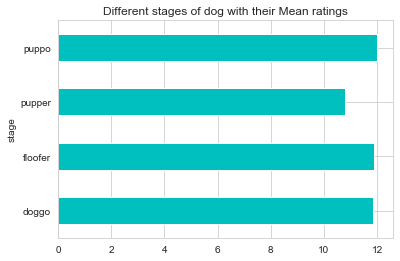

In [101]:
# Visualize the stage group in a bar graph
sns.set_style('whitegrid')
stage_group.plot(kind='barh',title='Different stages of dog with their Mean ratings', color='c');
plt.savefig('dog_stage_rating')

**Observation**: Though their seems to be not much significant difference between the Mean ratings for each stage of a dog, but we can conclude that 'puppo' is slightly more popular than the rest.

#### 2. How does a rating score affect the popularity of a tweet?

- Relation between a dogs rating and the mean number of retweets which a tweet of particular rating gets.

*Since the number of tweets varies for each rating, calculating the proportion of retweets for each rating is meaningful enough for the analysis*

In [88]:
# filtering the tweets which have ratings greater than 20 (outliers)
ratings = c_df_tweet_master[c_df_tweet_master['rating_numerator'] <= 20][['rating_numerator','retweet_count']]
# grouping the tweets by the rating and finding their mean retweet count
retweets = ratings.groupby(['rating_numerator'])['retweet_count'].mean()

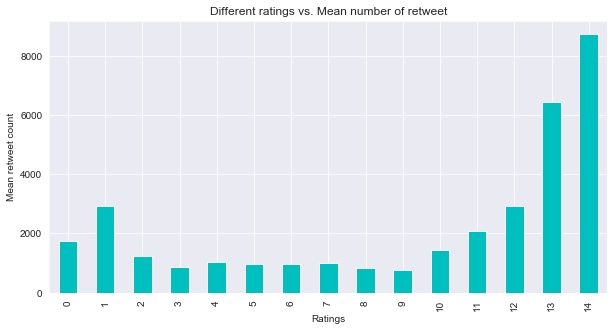

In [102]:
# plot the relation between ratings and retweet_count in a bar graph
sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize=(10,5))
retweets.plot(kind='bar',title='Different ratings vs. Mean number of retweet', color='c');
plt.xlabel('Ratings');
plt.ylabel('Mean retweet count');
plt.savefig('retweet_ratings')

**Observation**: As can be seen from the above bar graph, the number of retweets increases drastically for the higher rated dogs.

- Relation between a dogs rating and the mean favorite count which a tweet of particular rating gets.

In [90]:
# filtering the tweets which have ratings greater than 20 (outliers)
ratings = c_df_tweet_master[c_df_tweet_master['rating_numerator'] <= 20][['rating_numerator','favorite_count']]
# grouping the tweets by the rating and finding their mean favorites count
favorites = ratings.groupby(['rating_numerator'])['favorite_count'].mean()

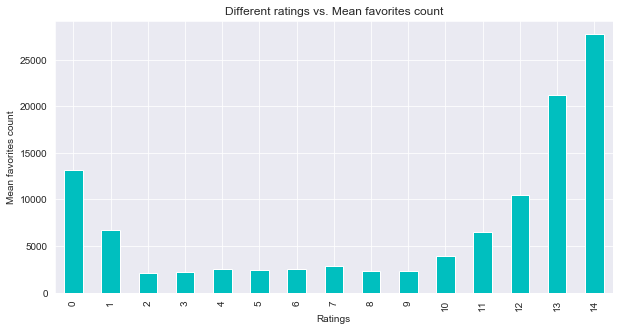

In [104]:
# plot the relation between ratings and favorite_count in a bar graph
sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize=(10,5))
favorites.plot(kind='bar',title='Different ratings vs. Mean favorites count', color='c');
plt.xlabel('Ratings');
plt.ylabel('Mean favorites count');
plt.savefig('favorites_ratings')

**Observation**: As can be seen from the above bar graph, the favorites count also increases drastically for the higher rated dogs.

Hence it can be concluded that both number of retweets and favorites count increases drastically if a tweet has a high rating score

#### 3. Most common used source for publishing tweets in twitter by WeRateDogs

In [92]:
# count number of tweets grouped by their sources
sources = c_df_tweet_master.groupby(['source'])['tweet_id'].count()
sources

source
TweetDeck                10
Twitter Web Client       30
Twitter for iPhone     1958
Vine - Make a Scene      89
Name: tweet_id, dtype: int64

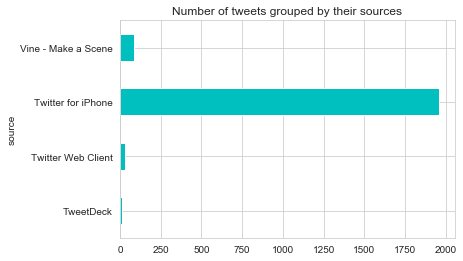

In [105]:
# plot a horizontal bar graph
sns.set_style('whitegrid')
sources.plot(kind='barh',title='Number of tweets grouped by their sources',color='c');
plt.savefig('source_tweet_count')

**Observation**: Twitter for iPhone is the most used source for posting tweets by the account WeRateDogs.

#### 4. Top 5 most common breed of dog among all the tweets (breeds assigned after filtering them with a 95% confidence interval).  

In [94]:
# find the top five most common breeds of dogs after filtering them with a 95% confidence interval
breeds = c_df_tweet_master['breed'].value_counts()
breeds = breeds[breeds.index != "None"]
breeds.iloc[:5]

pug                 20
pembroke            19
samoyed             18
golden_retriever    15
pomeranian          13
Name: breed, dtype: int64

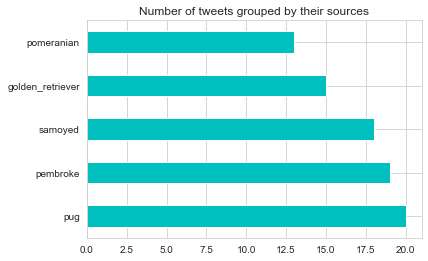

In [106]:
# plot a horizontal bar graph
sns.set_style('whitegrid')
breeds.iloc[:5].plot(kind='barh',title='Number of tweets grouped by their sources',color='c');
plt.savefig('breed_tweet_count')

**Observation**: 'pug', 'pembroke', 'samoyed', 'golden retriever' and 'pomeranian' are the top five most common breed of dogs tweeted among which 'pug' is the most common. 

#### 5. Top 5 most common names of dogs

In [96]:
# group by dog names and sort by the descending order the most number of occurence of a name
dog_names = c_df_tweet_master.groupby(['name'])['tweet_id'].count().sort_values(ascending=False)
dog_names.head()

name
Lucy       11
Charlie    10
Cooper     10
Oliver     10
Penny       9
Name: tweet_id, dtype: int64

**Observation**: The top 5 names of dogs from the tweets by We Rate Dogs are *Lucy, Charlie, Cooper, Oliver and Pennny*

#### 6. Trend for number of tweets over the years.

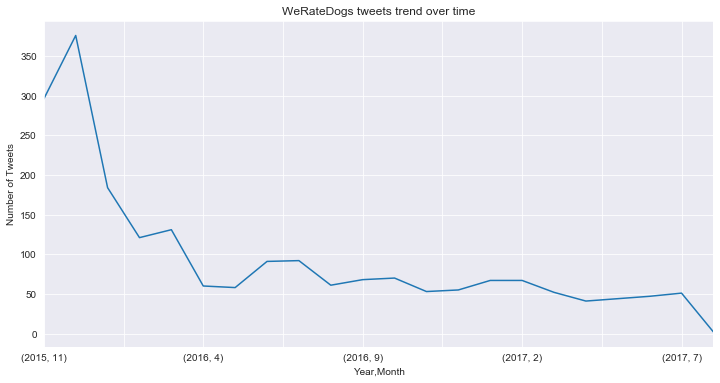

In [107]:
# plot the trend in a line chart
sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize=(12,6))
# group the tweet_count by year and month
tweet_data = c_df_tweet_master.groupby([c_df_tweet_master["timestamp"].dt.year,c_df_tweet_master["timestamp"].dt.month])['tweet_id'].count()
tweet_data.plot(kind='line', title='WeRateDogs tweets trend over time')
plt.xlabel("Year,Month")
plt.ylabel("Number of Tweets");
plt.savefig('tweet_trend')

**Observation**: The trend of number of tweets over time shows that the number of tweets posted by WeRateDogs decreases significantly over time with the number of tweets being highest in the year 2015 to its lowest in the year 2017.

#### 7. Trend of retweet and favorites count over time

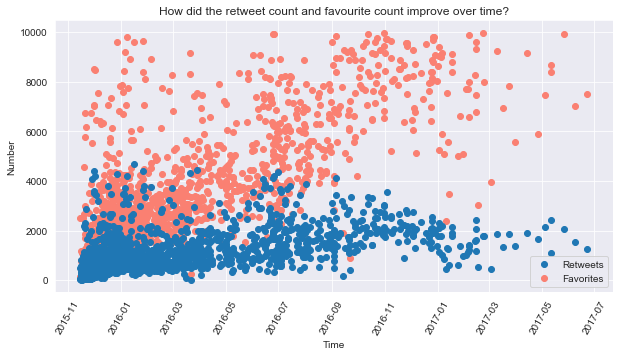

In [108]:
# plot a scatter plot to show the trends
sns.set_style('darkgrid')
time = pd.to_datetime(c_df_tweet_master[c_df_tweet_master.favorite_count < 10000].timestamp).dt.date
fig, ax = plt.subplots(figsize=(10,5))
# filter the favorite_count for value less than 10000 for proper visualization in scatter plot
favorite_count, = plt.plot_date(time,c_df_tweet_master[c_df_tweet_master.favorite_count < 10000].favorite_count, color='salmon')
retweet_count, = plt.plot_date(time,c_df_tweet_master[c_df_tweet_master.favorite_count < 10000].retweet_count)

plt.xlabel('Time')
plt.ylabel('Number')
plt.title('How did the retweet count and favourite count improve over time?')
plt.legend([retweet_count, favorite_count],['Retweets','Favorites'])
ax.xaxis.set_tick_params(rotation=60, labelsize=10)
plt.savefig('retweet_favorite_count')

**Observation**: It can be seen that in previous years(from the year 2015), the number of tweets posted by WeRateDogs is significantly high than that of the later years(since the end of 2016) and the retweet count and favorite count are both are quite similar. After 2016, the number of tweets become much lesser, but the the number of the favourite counts become much higher. Another trend noticed is that favourite counts seem to increase drastically whereas the retweet counts kind of remain constant being less than 5000 for the entire duration.

#### 8. Analyzing the predictions made by the prediction model used in the image predictions table

In [99]:
# get statistical insights from image_predictions data
c_df_img_predict.describe()

,img_num,p1_conf,p2_conf,p3_conf
count,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,1.203855,0.594548,1.345886e-01,6.032417e-02
std,0.561875,0.271174,1.006657e-01,5.090593e-02
min,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,1.000000,0.843855,1.955655e-01,9.180755e-02
max,4.000000,1.000000,4.880140e-01,2.734190e-01


The max value for column `p1_conf` is 1 which shows that the prediction made in `p1` are suggested to be 100% correct by the model. So, let's analyze those records for which the value of `p1_conf` is 1 and check if it's right or wrong.

In [100]:
c_df_img_predict[c_df_img_predict['p1_conf'] == 1]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
106,667866724293877760,https://pbs.twimg.com/media/CUS9PlUWwAANeAD.jpg,1,jigsaw_puzzle,1.0,False,prayer_rug,1.011300e-08,False,doormat,1.740170e-10,False


Now let's confirm if the image provided in the url in column `jpg_url` is of a jigsaw_puzzle and not of a dog.

![title](https://pbs.twimg.com/media/CUS9PlUWwAANeAD.jpg)

**Observation**: It can be seen that even though the image predicted in `p1`(i.e. jigsaw_puzzle) was totally correct, the model actually failed to detect the dog in the image which was indeed the objective of the model.

## Conclusion

In conclusion it can be said that this project involved the whole process of Data Wrangling along with drawing insights from the wrangled data by analyzing different metric relations with the help of visualizations. Also, it was more of a iterative process where one has the liberty of going to and fro the process of Data Gathering, Assessing and Cleaning in order to shape and formulated the data in the way one wants it to be for analyzing it. This project covered almost most of the operations a Data Analyst probably does on a daily basis in his/her job.